In [3]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [12]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """

    x = np.zeros(np.shape(t)) #just setting up the size of the solution
    x[0] = x0
    for i in range(1, len(t)):
        deltaT = t[i] - t[i-1]
        x[i] = x[i-1] + deltaT*(f(x[i-1], t[i-1])) #simple Euler method
            
    return x

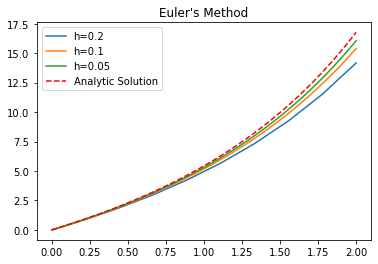

In [23]:
# Define functions
f = lambda x,t: x - 2*t + 4
soln = lambda t: -2 + 2*t + 2*np.exp(t)
t_vals = np.linspace(0,2,100)
hs = [.2, .1, .05]
x0 = 0

# Iterate through different h values for eulers method
for h in hs:
    t = np.linspace(0, 2, int(2/h))
    x = euler(f, x0, t)
    plt.plot(t,x, label=f"h={h}")
    plt.title("Euler's Method")
    
# Plot
plt.plot(t_vals, soln(t_vals), 'r--', label = "Analytic Solution")
plt.legend()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [47]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    x = np.zeros(np.shape(t)) #just setting up the size of the solution
    
    # Midpoint method
    x[0] = x0
    for i in range(1, len(t)):
        deltaT = t[i] - t[i-1]
        x[i] = x[i-1] + deltaT*f(x[i-1] + deltaT/2*f(x[i-1], t[i-1]), t[i-1] + deltaT/2)
    
    return x
    
def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    x = np.zeros(np.shape(t)) #just setting up the size of the solution
    
    # RK4 Method
    x[0] = x0
    for i in range(1, len(t)):
        deltaT = t[i] - t[i-1]
        k0 = f(x[i-1], t[i-1])
        k1 = f(x[i-1] + .5*deltaT*k0, t[i-1] + deltaT/2)
        k2 = f(x[i-1] + .5*deltaT*k1, t[i-1] + deltaT/2)
        k3 = f(x[i-1] + deltaT*k2, t[i])
        x[i] = x[i-1] + (deltaT/6)*(k0+2*k1+2*k2+k3)
            
    return x

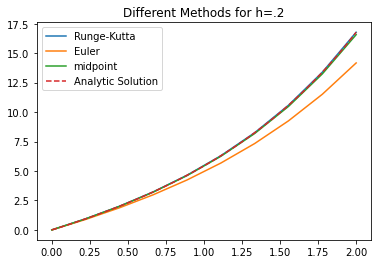

In [48]:
# Define functions
f = lambda x,t: x - 2*t + 4
soln = lambda t: -2 + 2*t + 2*np.exp(t)
t_vals = np.linspace(0,2,100)
h = .2
x0 = 0

# Plot for each method
t = np.linspace(0, 2, int(2/h))
x = rk4(f, x0, t)
plt.plot(t,x, label="Runge-Kutta")
x = euler(f,x0,t)
plt.plot(t,x, label="Euler")
x = midpoint(f,x0,t)
plt.plot(t,x, label="midpoint")
plt.title("Different Methods for h=.2")
    
plt.plot(t_vals, soln(t_vals), '--', label = "Analytic Solution")
plt.legend()

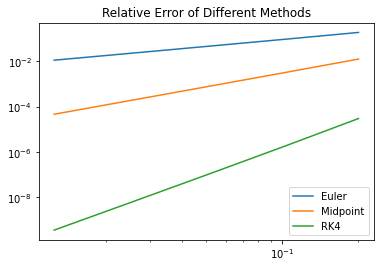

In [53]:
# Define functions and initial values
f = lambda x,t: x - 2*t + 4
soln = lambda t: -2 + 2*t + 2*np.exp(t)
t_vals = np.linspace(0,2,100)
hs = [.2, .1, .05, .025, .0125]
x0 = 0
xs = []
ys = []
zs = []

# Iterate through hs and append x(2) for each
for h in hs:
    t = np.linspace(0, 2, int(2/h))
    x = euler(f, x0, t)
    xs.append(x[-1])
    y = midpoint(f,x0,t)
    ys.append(y[-1])
    z = rk4(f,x0,t)
    zs.append(z[-1])

# Define error function
error = lambda x: np.abs(x - soln(t_vals[-1])) / np.abs(x)

# Plot error for each method
plt.loglog(hs, [np.abs(x - soln(t_vals[-1])) / np.abs(x) for x in xs], label="Euler")
plt.loglog(hs, error(ys), label="Midpoint")
plt.loglog(hs, error(zs), label="RK4")
    
plt.title("Relative Error of Different Methods")
plt.legend()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

In [96]:
def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    
    x = np.zeros((np.shape(t)[0], np.shape(x0)[0])) #just setting up the size of the solution
    x[0,:] = x0
    
    # RK4 Method
    for i in range(1, len(t)):
        deltaT = t[i] - t[i-1]
        k0 = f(x[i-1], t[i-1])
        k1 = f(x[i-1] + .5*deltaT*k0, t[i-1] + deltaT/2)
        k2 = f(x[i-1] + .5*deltaT*k1, t[i-1] + deltaT/2)
        k3 = f(x[i-1] + deltaT*k2, t[i])
        x[i] = x[i-1] + (deltaT/6)*(k0+2*k1+2*k2+k3)
            
    return x

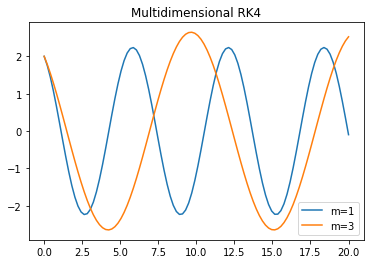

In [114]:
# Define ODE
m = 1
k=1
f = lambda x,t: np.array([x[1], (-k/m)*x[0]])

# Set values
t = np.linspace(0, 20, 100)
x = [0,0]
x[0] = 2
x[1] = -1
x0 = x

# Plot for m=1 and m=3
x = rk4(f, x0, t)
plt.plot(t,x[:,0], label="m=1")
m=3
x = rk4(f, x0, t)
plt.plot(t,x[:,0], label="m=3")
plt.title("Multidimensional RK4")
plt.legend()
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

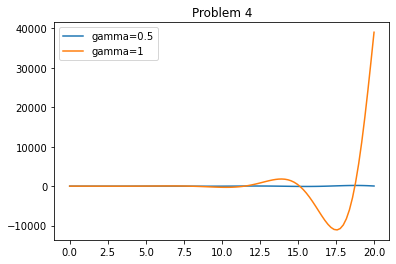

In [113]:
f = lambda x,t: np.array([x[1], gamma*x[1] - x[0]])
t = np.linspace(0, 20, 100)
x0 = [1,-1]

for gamma in [1/2,1]:
    x = rk4(f, x0, t)
    plt.plot(t,x[:,0], label=f"gamma={gamma}")
    plt.title("Problem 4")
    plt.legend()
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

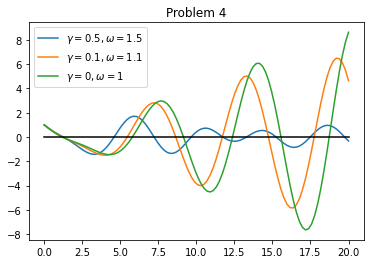

In [116]:
# Define function and intial values
f = lambda x,t: np.array([x[1], np.cos(omega*t)-x[0] - .5*gamma*x[1]])
t = np.linspace(0, 20, 100)
x0 = [1,-1]

# Iterate through values of gamma and omega then plot
for (gamma,omega) in [(1/2,1.5), (.1, 1.1), (0,1)]:
    x = rk4(f, x0, t)
    plt.plot(t,x[:,0], label=f"$\gamma={gamma},\omega={omega}$")
    plt.title("Problem 4")
    plt.legend()
plt.plot(t,np.zeros_like(t),'k')
plt.show()